# Predicting the prices of houses

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [60]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) 

4.5.0


In [61]:
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [62]:
data=pd.read_csv("train (1).csv")
test_data=pd.read_csv("test (1).csv")

In [63]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [64]:
data.columns.values

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'Pav

In [65]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [67]:
null_columns=["Alley","FireplaceQu","PoolQC","Fence","MiscFeature"]
x=data.copy()
x=x.drop("SalePrice",axis=1)
y=data["SalePrice"]
x[null_columns]=x[null_columns].fillna(0)

In [68]:
x[null_columns]

,Alley,FireplaceQu,PoolQC,Fence,MiscFeature
0,0,0,0,0,0
1,0,TA,0,0,0
2,0,TA,0,0,0
3,0,Gd,0,0,0
4,0,TA,0,0,0
...,...,...,...,...,...
1455,0,TA,0,0,0
1456,0,TA,0,MnPrv,0
1457,0,Gd,0,GdPrv,Shed
1458,0,0,0,0,0


In [69]:
# Separating columns 
categorical_columns=[cname for cname in x.columns.values if x[cname].dtypes=="object"]
numerical_columns=[cname for cname in x.columns.values if x[cname].dtypes in ["float64","int64"]]
print(numerical_columns)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [70]:
from sklearn.impute import SimpleImputer

In [71]:
#dealing with null for train_dataset
catimp=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
numimp=SimpleImputer(missing_values=np.nan,strategy="mean")
imputed_categorical_columns=pd.DataFrame(catimp.fit_transform(x[categorical_columns].astype(str)))
imputed_numerical_columns=pd.DataFrame(numimp.fit_transform(x[numerical_columns]))
imputed_categorical_columns.columns=x[categorical_columns].columns
imputed_numerical_columns.columns=x[numerical_columns].columns
imputed_train=imputed_categorical_columns.join(imputed_numerical_columns)
#dealing with null values in test_data
imputed_test_categorical_columns=pd.DataFrame(catimp.fit_transform(test_data[categorical_columns]))
imputed_test_numerical_columns=pd.DataFrame(numimp.fit_transform(test_data[numerical_columns]))
imputed_test_numerical_columns.columns=test_data[numerical_columns].columns
imputed_test_categorical_columns.columns=test_data[categorical_columns].columns
imputed_test=imputed_test_categorical_columns.join(imputed_test_numerical_columns)

In [72]:
imputed_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSZoning         1460 non-null object
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 non-null object
ExterQual        1460 non-null object
ExterCond        1460 non-null object
Foundation       1460 non-null object
BsmtQual         1460 non-null object
BsmtCond         1460 non-null object
BsmtExposure     14

In [73]:
imputed_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
MSZoning         1459 non-null object
Street           1459 non-null object
Alley            1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1459 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1459 non-null object
Exterior2nd      1459 non-null object
MasVnrType       1459 non-null object
ExterQual        1459 non-null object
ExterCond        1459 non-null object
Foundation       1459 non-null object
BsmtQual         1459 non-null object
BsmtCond         1459 non-null object
BsmtExposure     14

# Normalizing train_data

In [74]:
for cname in numerical_columns:
    imputed_train[cname]=(imputed_train[cname]-imputed_train[cname].mean())/imputed_train[cname].std()

In [75]:
#finding bad and good columns in categorical_columns
good_columns=[cname for cname in categorical_columns if(set(imputed_train[cname])==set(imputed_test[cname]))]
print(good_columns)
bad_columns=list(set(categorical_columns)-set(good_columns))
print('\n\n')
print(bad_columns)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'RoofStyle', 'ExterQual', 'ExterCond', 'Foundation', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']



['BsmtFinType1', 'GarageCond', 'BsmtQual', 'HouseStyle', 'PoolQC', 'Exterior2nd', 'Heating', 'Utilities', 'GarageFinish', 'MasVnrType', 'Alley', 'Fence', 'BsmtExposure', 'BsmtCond', 'BsmtFinType2', 'GarageQual', 'FireplaceQu', 'GarageType', 'MiscFeature', 'RoofMatl', 'Condition2', 'Exterior1st', 'Electrical']


# Labeling our good columns

In [76]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [77]:
label=LabelEncoder()
label_train_columns=imputed_train[good_columns].apply(label.fit_transform)
label_test_columns=imputed_test[good_columns].apply(label.fit_transform)
label_train_columns.columns=imputed_train[good_columns].columns
label_test_columns.columns=imputed_test[good_columns].columns
label_train=label_train_columns.join(imputed_train[numerical_columns])
label_test=label_test_columns.join(imputed_test[numerical_columns])


In [78]:
label_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 57 columns):
MSZoning         1460 non-null int32
Street           1460 non-null int32
LotShape         1460 non-null int32
LandContour      1460 non-null int32
LotConfig        1460 non-null int32
LandSlope        1460 non-null int32
Neighborhood     1460 non-null int32
Condition1       1460 non-null int32
BldgType         1460 non-null int32
RoofStyle        1460 non-null int32
ExterQual        1460 non-null int32
ExterCond        1460 non-null int32
Foundation       1460 non-null int32
HeatingQC        1460 non-null int32
CentralAir       1460 non-null int32
KitchenQual      1460 non-null int32
Functional       1460 non-null int32
PavedDrive       1460 non-null int32
SaleType         1460 non-null int32
SaleCondition    1460 non-null int32
Id               1460 non-null float64
MSSubClass       1460 non-null float64
LotFrontage      1460 non-null float64
LotArea          1460 non-null float

In [79]:
label_train.describe()

,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,RoofStyle,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03
mean,3.028767,0.995890,1.942466,2.777397,3.019178,0.062329,12.251370,2.031507,0.493151,1.410274,...,1.596896e-18,1.539104e-16,9.022463e-17,1.649366e-16,4.386141e-16,-7.969272e-17,-6.183600e-16,-1.173529e-16,6.681299e-17,3.563078e-14
std,0.632017,0.063996,1.409156,0.707666,1.622634,0.276232,6.013735,0.868515,1.198277,0.834998,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-2.212205e+00,-7.519182e-01,-7.042419e-01,-3.592018e-01,-1.162994e-01,-2.701158e-01,-6.866822e-02,-8.765778e-02,-1.968437e+00,-1.367186e+00
25%,3.000000,1.000000,0.000000,3.000000,2.000000,0.000000,7.000000,2.000000,0.000000,1.000000,...,-6.476941e-01,-7.519182e-01,-7.042419e-01,-3.592018e-01,-1.162994e-01,-2.701158e-01,-6.866822e-02,-8.765778e-02,-4.889425e-01,-6.142282e-01
50%,3.000000,1.000000,3.000000,3.000000,4.000000,0.000000,12.000000,2.000000,0.000000,1.000000,...,3.283304e-02,-7.519182e-01,-3.269178e-01,-3.592018e-01,-1.162994e-01,-2.701158e-01,-6.866822e-02,-8.765778e-02,-1.190689e-01,1.387300e-01
75%,3.000000,1.000000,3.000000,3.000000,4.000000,0.000000,17.000000,2.000000,0.000000,1.000000,...,4.818406e-01,5.884489e-01,3.220798e-01,-3.592018e-01,-1.162994e-01,-2.701158e-01,-6.866822e-02,-8.765778e-02,6.206783e-01,8.916881e-01
max,4.000000,1.000000,3.000000,3.000000,4.000000,2.000000,24.000000,8.000000,4.000000,5.000000,...,4.420012e+00,6.085550e+00,7.551611e+00,8.672338e+00,1.721134e+01,8.338605e+00,1.829991e+01,3.115459e+01,2.100173e+00,1.644646e+00


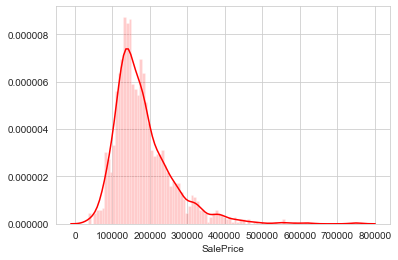

In [80]:
sns.distplot(y,color="r",bins=100,hist_kws={'alpha':0.2})

In [81]:
label_train.corr()

,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,RoofStyle,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
MSZoning,1.000000,0.087654,0.061887,-0.017854,-0.009895,-0.022055,-0.249679,-0.027874,0.005690,-0.000301,...,-0.189250,-0.009477,-0.154704,0.115509,0.000362,0.019089,-0.003128,0.009293,-0.031496,-0.020628
Street,0.087654,1.000000,-0.010224,0.115995,0.013960,-0.179360,-0.011561,-0.071657,-0.018243,-0.019732,...,-0.047794,-0.017990,-0.005664,0.023082,0.007473,-0.033160,0.004413,-0.022733,0.003690,-0.025043
LotShape,0.061887,-0.010224,1.000000,0.085434,0.221102,-0.099951,-0.038894,-0.115003,0.116262,0.003182,...,-0.160639,-0.166946,-0.075412,0.078213,-0.036459,-0.053054,-0.020051,-0.042061,-0.033455,0.036449
LandContour,-0.017854,0.115995,0.085434,1.000000,-0.025527,-0.374267,0.019116,0.024801,0.051143,-0.004246,...,0.047626,-0.002879,0.040676,-0.058742,-0.021404,0.003836,-0.013098,0.020912,-0.011599,0.020507
LotConfig,-0.009895,0.013960,0.221102,-0.025527,1.000000,-0.007256,-0.036597,0.021457,0.107229,-0.010364,...,-0.064023,-0.035635,-0.054614,-0.070429,-0.030479,-0.004657,-0.046798,-0.018427,0.018902,-0.005992
LandSlope,-0.022055,-0.179360,-0.099951,-0.374267,-0.007256,1.000000,-0.080405,-0.016762,-0.053582,-0.027739,...,0.004826,0.095156,-0.032622,-0.008843,0.008694,0.052976,-0.015505,-0.003518,0.007072,-0.002305
Neighborhood,-0.249679,-0.011561,-0.038894,0.019116,-0.036597,-0.080405,1.000000,-0.025401,0.005993,0.109937,...,0.213578,0.059370,0.144691,0.028803,-0.024197,0.013697,-0.010438,0.000895,0.023222,0.036697
Condition1,-0.027874,-0.071657,-0.115003,0.024801,0.021457,-0.016762,-0.025401,1.000000,-0.023501,0.002956,...,0.075208,0.045338,0.085861,-0.079213,0.070610,0.011043,0.008742,-0.011454,-0.009868,-0.009819
BldgType,0.005690,-0.018243,0.116262,0.051143,0.107229,-0.053582,0.005993,-0.023501,1.000000,-0.054389,...,-0.061421,-0.013075,-0.037160,-0.114726,-0.022845,-0.028046,-0.028280,-0.009583,-0.025764,0.002006
RoofStyle,-0.000301,-0.019732,0.003182,-0.004246,-0.010364,-0.027739,0.109937,0.002956,-0.054389,1.000000,...,0.141866,0.079109,0.005978,-0.014673,0.022445,0.066667,0.019928,0.096802,0.009767,0.019385


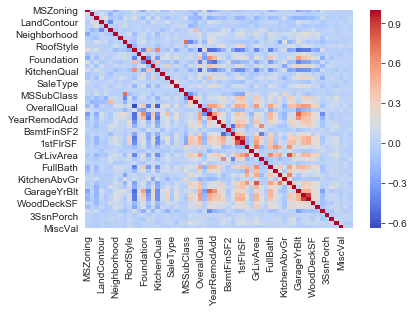

In [82]:
sns.heatmap(label_train.corr(),cmap="coolwarm")

In [83]:
data.iplot(kind="scatter",x="YrSold",y="SalePrice",mode="markers")

In [84]:
data["OverallQual"].value_counts().iplot(kind="bar")

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
x_train,x_test,y_train,y_test=train_test_split(label_train,y,test_size=0.2,random_state=20)

In [87]:
label_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 57 columns):
MSZoning         1459 non-null int32
Street           1459 non-null int32
LotShape         1459 non-null int32
LandContour      1459 non-null int32
LotConfig        1459 non-null int32
LandSlope        1459 non-null int32
Neighborhood     1459 non-null int32
Condition1       1459 non-null int32
BldgType         1459 non-null int32
RoofStyle        1459 non-null int32
ExterQual        1459 non-null int32
ExterCond        1459 non-null int32
Foundation       1459 non-null int32
HeatingQC        1459 non-null int32
CentralAir       1459 non-null int32
KitchenQual      1459 non-null int32
Functional       1459 non-null int32
PavedDrive       1459 non-null int32
SaleType         1459 non-null int32
SaleCondition    1459 non-null int32
Id               1459 non-null float64
MSSubClass       1459 non-null float64
LotFrontage      1459 non-null float64
LotArea          1459 non-null float

In [88]:
from xgboost import XGBRegressor

In [89]:
reg=XGBRegressor(n_estimators=2000,learning_rate=0.01)

In [90]:
reg.fit(x_train,y_train)

C:\Users\Acer\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version



[15:55:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=2000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [91]:
reg.score(x_train,y_train)

0.9759801251324177

In [98]:
reg.score(x_test,y_test)

0.9070077217904602

In [93]:
predictions=reg.predict(label_test)

In [94]:
predictions

array([366298.53, 445387.4 , 416979.38, ..., 346773.7 , 349707.22,
       528427.  ], dtype=float32)

In [99]:
output=pd.DataFrame({"ID":label_test["Id"],"Predictions":predictions})

In [100]:
output

,ID,Predictions
0,1461.0,366298.53125
1,1462.0,445387.40625
2,1463.0,416979.37500
3,1464.0,521914.43750
4,1465.0,409208.53125
...,...,...
1454,2915.0,409730.78125
1455,2916.0,409203.03125
1456,2917.0,346773.68750
1457,2918.0,349707.21875
